# 1.Business understanding

### **Context & Rationale**

#### Accurate rainfall prediction plays a pivotal role across various sectors, including agriculture, disaster preparedness, and urban planning. In agriculture, timely and precise forecasts are essential to avoid crop losses, while in urban planning, accurate predictions help mitigate the risk of flooding and infrastructure damage. Additionally, accurate rainfall predictions support disaster preparedness by allowing authorities to take proactive measures, reducing economic and social disruptions. 

#### Traditional weather prediction models often rely on rigid, rule-based systems that struggle to account for the complex, non-linear relationships between meteorological variables. This limitation frequently results in less reliable forecasts and missed opportunities for early intervention.

### **Opportunity**

#### This project seeks to address these challenges by adopting a modern, AI-driven approach to rainfall prediction. Through the use of advanced machine learning techniques, we aim to develop a high-accuracy binary classification model that can predict rainfall occurrence with unprecedented precision, ultimately improving decision-making across multiple critical sectors.

### **Strategic Value**

#### 1. **Farmers & Agribusiness**  
- **Optimizing Irrigation Schedules**:  
  Leveraging AI-driven rainfall predictions allows farmers to fine-tune irrigation schedules based on more accurate and localized forecasts. This ensures optimal water usage, reduces costs, and improves crop yields.  
- **Reducing Crop Loss Risk**:  
  AI-powered rainfall models enable early warnings for extreme weather events, helping farmers mitigate crop damage from unexpected rainfall, droughts, or floods, and adapt to changing climate patterns.

#### 2. **Disaster Management**  
- **Enhancing Flood Forecasting**:  
  AI algorithms, combined with real-time rainfall data, enhance flood forecasting capabilities, enabling better preparedness and timely evacuation plans to protect lives and property from flood risks.  
- **Emergency Preparedness**:  
  With AI-powered rainfall predictions, disaster response teams can be better equipped to allocate resources based on anticipated rainfall patterns, improving response times and the effectiveness of relief efforts.

#### 3. **Urban Infrastructure**  
- **Optimizing Drainage Systems**:  
  AI-driven rainfall forecasting assists city planners in managing urban drainage systems more efficiently. It predicts heavy rainfall events, ensuring that drainage infrastructure is prepared to handle peak water flows, reducing the risk of urban flooding.  
- **Water Resource Management**:  
  By using AI to predict rainfall patterns and water availability, cities can better manage water resources, optimize storage and distribution, and plan for future water demands, ensuring sustainability in urban water management.

#### 4. **Sustainability & Climate Adaptation**  
- **Enhancing Climate Resilience**:  
  AI-powered rainfall predictions support climate adaptation strategies by providing more accurate insights into weather trends, enabling industries and governments to plan for and mitigate the effects of extreme weather events on ecosystems and infrastructure.  
- **Promoting Efficient Resource Use**:  
  By integrating AI predictions with real-time data, industries can optimize their water and resource consumption, reduce waste, and contribute to more sustainable operations.

# Project Objectives & Key Performance Indicators (KPIs)

## Primary Objective:
- **Develop a High-Accuracy Rainfall Prediction Model**  
  Create a machine learning model for binary classification to predict rainfall occurrence. The model will output:
  - Rain = 1
  - No Rain = 0  

## Secondary Objectives:

#### 1. **Exploratory Data Analysis (EDA)**  
   - Investigate underlying weather patterns that influence rainfall.  
   - Analyze key features such as temperature, humidity, wind speed, and pressure to understand their relationship with rainfall.

#### 2. **Feature Engineering**  
   - Enhance the dataset with high-impact features and variables, transforming raw data into meaningful inputs that improve model performance.

#### 3. **Model Selection & Tuning**  
   - Implement and test various machine learning algorithms (e.g., Logistic Regression, Decision Trees, Random Forest, XGBoost, etc.).  
   - Fine-tune hyperparameters to optimize model performance and accuracy.

#### 4. **Performance Optimization**  
   - Strive for **≥97% accuracy** in the rainfall prediction model.  
   - Aim for a **Top 10 placement** on the Kaggle leaderboard to showcase model robustness and competitiveness.

#### 5. **Academic & Industry Impact**  
   - Showcase a comprehensive, end-to-end AI-driven workflow that can be adopted for real-world weather forecasting applications.  
   - Ensure the model is applicable to both academic research and industry use cases.

#### 6. **Reproducibility & Documentation**  
   - Provide clear and detailed documentation of the entire process, ensuring the project is easily reproducible.  
   - Adhere to industry best practices for model development, version control, and code clarity.

#### 7. **Collaboration & Knowledge Sharing**  
   - Engage with the data science community (e.g., through Kaggle discussions, research papers) to share insights and methodologies.  
   - Encourage open-source collaboration to refine the model and expand its applicability.

#### 8. **Scalability & Real-Time Application**  
   - Design the model with scalability in mind, ensuring that it can handle large datasets and real-time weather data for operational deployment.

#### 9. **Ethical Considerations & Transparency**  
   - Prioritize transparency in model decision-making to ensure fairness and trustworthiness, particularly when deployed in high-stakes real-world scenarios such as disaster preparedness and resource management.




# 2.Data Understanding & Competitive Dataset Analysis

## Dataset Source & Overview
This project is based on Kaggle’s Playground Series - S5E3 competition dataset, consisting of historical meteorological data designed to challenge participants in predictive modeling.

## Dataset Breakdown
- **Train Dataset (train.csv)**: 2,190 samples with 13 features.
- **Test Dataset (test.csv)**: 730 samples with 12 features (excludes rainfall target variable).
- **Submission File (sample_submission.csv)**: Kaggle’s submission format for predicted outputs.

## Feature Engineering Considerations

| Feature       | Description & Significance                                                                 |
|---------------|--------------------------------------------------------------------------------------------|
| **day**       | Sequential identifier (potential time-series dependencies).                               |
| **pressure**  | Atmospheric pressure, influencing rainfall patterns.                                       |
| **maxtemp**   | Maximum recorded temperature, a potential indicator of precipitation likelihood.           |
| **temperature** | Average recorded temperature, linked to evaporation and condensation cycles.             |
| **mintemp**   | Minimum temperature, useful for analyzing dew point variations.                            |
| **dewpoint**  | Key metric for moisture content in the air.                                                |
| **humidity**  | Relative humidity (%), highly correlated with rainfall probability.                        |
| **cloud**     | Cloud cover percentage (%), a strong predictor for precipitation.                          |
| **sunshine**  | Total hours of sunshine, inversely affecting rainfall chances.                             |
| **winddirection** | Wind direction, impacting weather system movements.                                   |
| **windspeed** | Wind speed, affecting cloud formation and storm intensity.                                |
| **rainfall**  | Target Variable (1 = Rain, 0 = No Rain).                                                   |


## Exploratory Data Analysis & Data cleaning    

In [218]:
#Importing necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
plt.style.use('ggplot')
pd.set_option('display.max_columns', None)

In [219]:
# Reading from the data set
df = pd.read_csv('train.csv')
df.head()

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
0,0,1,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60.0,17.2,1
1,1,2,1019.5,16.2,16.9,15.8,15.4,95.0,91.0,0.0,50.0,21.9,1
2,2,3,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,70.0,18.1,1
3,3,4,1013.4,18.1,17.8,16.9,16.8,95.0,95.0,0.0,60.0,35.6,1
4,4,5,1021.8,21.3,18.4,15.2,9.6,52.0,45.0,3.6,40.0,24.8,0


In [220]:
df.shape

(2190, 13)

In [221]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2190 entries, 0 to 2189
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             2190 non-null   int64  
 1   day            2190 non-null   int64  
 2   pressure       2190 non-null   float64
 3   maxtemp        2190 non-null   float64
 4   temparature    2190 non-null   float64
 5   mintemp        2190 non-null   float64
 6   dewpoint       2190 non-null   float64
 7   humidity       2190 non-null   float64
 8   cloud          2190 non-null   float64
 9   sunshine       2190 non-null   float64
 10  winddirection  2190 non-null   float64
 11  windspeed      2190 non-null   float64
 12  rainfall       2190 non-null   int64  
dtypes: float64(10), int64(3)
memory usage: 222.5 KB


In [222]:
df.describe()

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
count,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000
mean,1094.500000,179.948402,1013.602146,26.365799,23.953059,22.170091,20.454566,82.036530,75.721918,3.744429,104.863151,21.804703,0.753425
std,632.342866,105.203592,5.655366,5.654330,5.222410,5.059120,5.288406,7.800654,18.026498,3.626327,80.002416,9.898659,0.431116
min,0.000000,1.000000,999.000000,10.400000,7.400000,4.000000,-0.300000,39.000000,2.000000,0.000000,10.000000,4.400000,0.000000
25%,547.250000,89.000000,1008.600000,21.300000,19.300000,17.700000,16.800000,77.000000,69.000000,0.400000,40.000000,14.125000,1.000000
50%,1094.500000,178.500000,1013.000000,27.800000,25.500000,23.850000,22.150000,82.000000,83.000000,2.400000,70.000000,20.500000,1.000000
75%,1641.750000,270.000000,1017.775000,31.200000,28.400000,26.400000,25.000000,88.000000,88.000000,6.800000,200.000000,27.900000,1.000000
max,2189.000000,365.000000,1034.600000,36.000000,31.500000,29.800000,26.700000,98.000000,100.000000,12.100000,300.000000,59.500000,1.000000


In [223]:
#Check for null values
df.isnull().sum()

id               0
day              0
pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
sunshine         0
winddirection    0
windspeed        0
rainfall         0
dtype: int64

In [224]:
#checking for duplicated values
df.duplicated().sum()

0

In [225]:
# Checking for duplicated Categorical columns
len(df['id'].unique())

2190

In [226]:
df['rainfall'].value_counts()

1    1650
0     540
Name: rainfall, dtype: int64

In [227]:
df['winddirection'].nunique()

35

In [228]:
df['temp_range'] = df['maxtemp'] - df['mintemp']

In [229]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2190 entries, 0 to 2189
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             2190 non-null   int64  
 1   day            2190 non-null   int64  
 2   pressure       2190 non-null   float64
 3   maxtemp        2190 non-null   float64
 4   temparature    2190 non-null   float64
 5   mintemp        2190 non-null   float64
 6   dewpoint       2190 non-null   float64
 7   humidity       2190 non-null   float64
 8   cloud          2190 non-null   float64
 9   sunshine       2190 non-null   float64
 10  winddirection  2190 non-null   float64
 11  windspeed      2190 non-null   float64
 12  rainfall       2190 non-null   int64  
 13  temp_range     2190 non-null   float64
dtypes: float64(11), int64(3)
memory usage: 239.7 KB


In [230]:
#Convert days into cyclical sine & cosine format
def convert_to_cyclical (days, max_value=365):

    # Covert days to a cyclical format
    df['sin_day'] = np.sin(2*np.pi * days / max_value)
    df['cos_day'] = np.cos(2 * np.pi * days/ max_value)


    return df['sin_day'], df['cos_day']

# Apply the function to the 'day' column of the existing DataFrame
convert_to_cyclical(days=df['day'],max_value=365)


df.head()

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall,temp_range,sin_day,cos_day
0,0,1,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60.0,17.2,1,1.3,0.017213,0.999852
1,1,2,1019.5,16.2,16.9,15.8,15.4,95.0,91.0,0.0,50.0,21.9,1,0.4,0.034422,0.999407
2,2,3,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,70.0,18.1,1,4.8,0.051620,0.998667
3,3,4,1013.4,18.1,17.8,16.9,16.8,95.0,95.0,0.0,60.0,35.6,1,1.2,0.068802,0.997630
4,4,5,1021.8,21.3,18.4,15.2,9.6,52.0,45.0,3.6,40.0,24.8,0,6.1,0.085965,0.996298


In [231]:
# To isolate the cos and sin days to concatenate after scaling etc other features
df_sin_cos_values = df[['sin_day','cos_day']]
df_sin_cos_values.head()

,sin_day,cos_day
0,0.017213,0.999852
1,0.034422,0.999407
2,0.051620,0.998667
3,0.068802,0.997630
4,0.085965,0.996298


In [232]:
df_features = df.drop(columns=['id','day','rainfall','sin_day', 'cos_day'])
df_features.head()
                      

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,temp_range
0,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60.0,17.2,1.3
1,1019.5,16.2,16.9,15.8,15.4,95.0,91.0,0.0,50.0,21.9,0.4
2,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,70.0,18.1,4.8
3,1013.4,18.1,17.8,16.9,16.8,95.0,95.0,0.0,60.0,35.6,1.2
4,1021.8,21.3,18.4,15.2,9.6,52.0,45.0,3.6,40.0,24.8,6.1


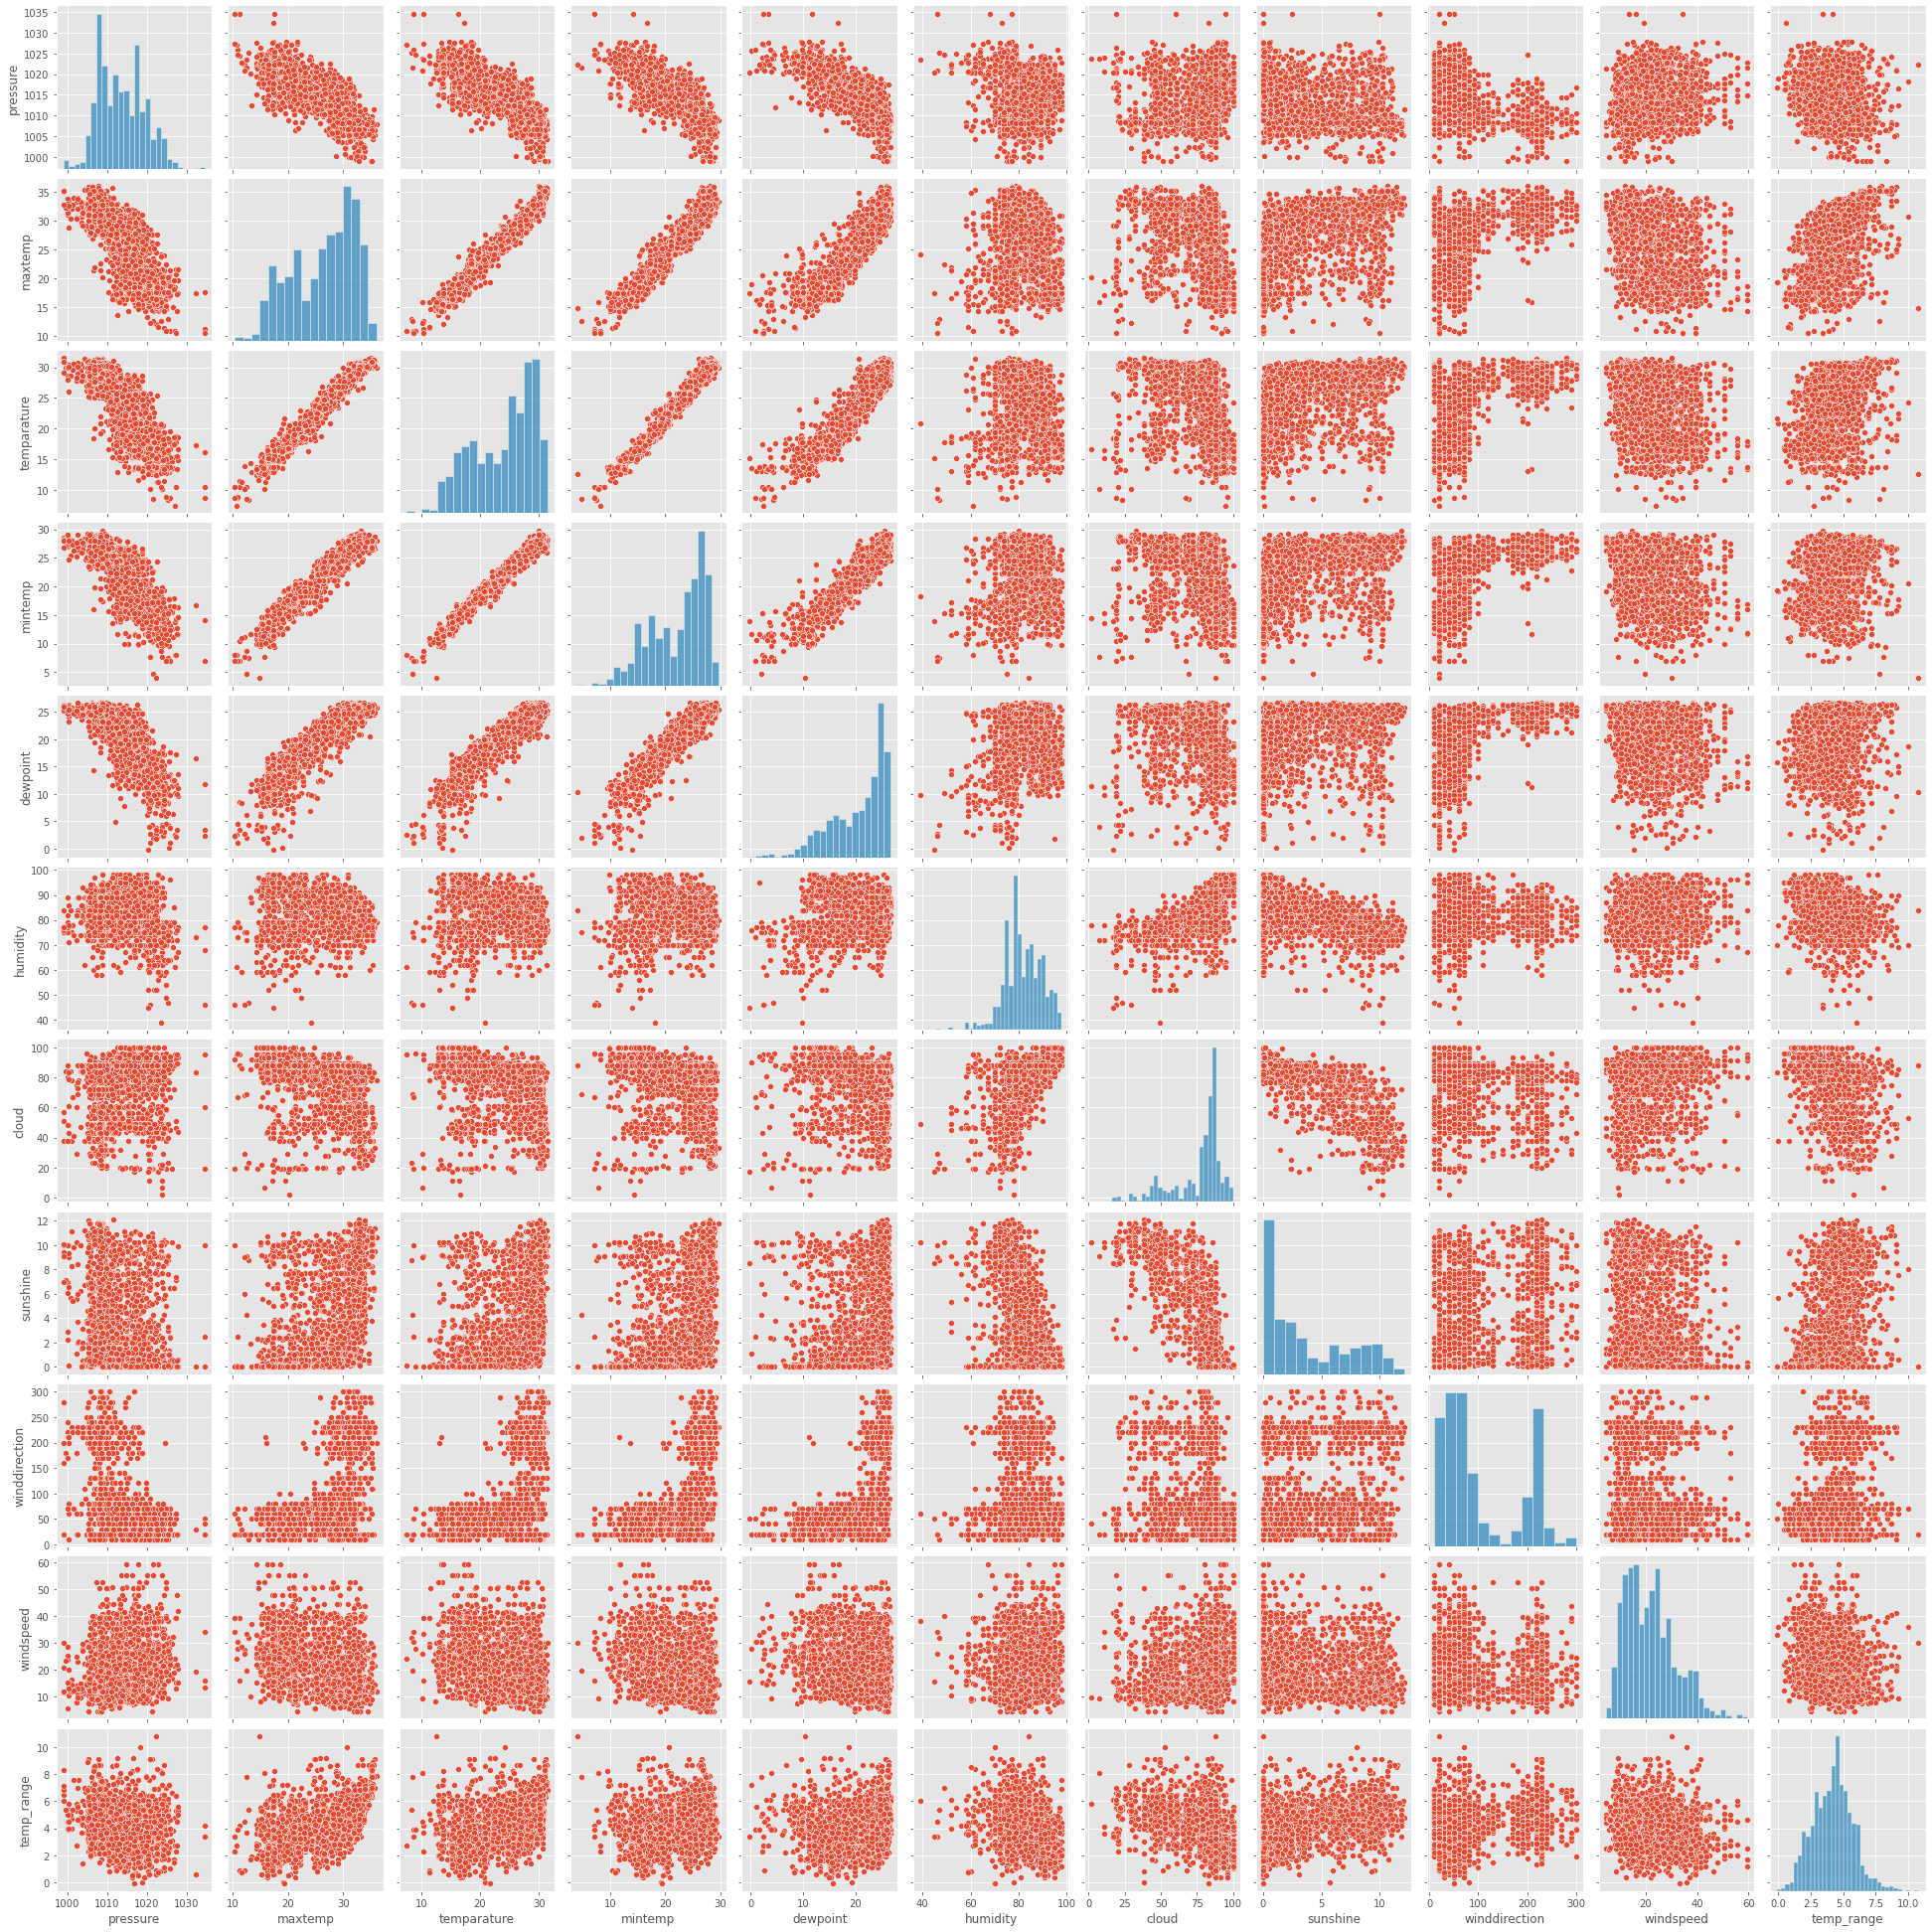

In [233]:
#Multivariate analysis
sns.pairplot(data=df_features);

In [234]:
corr_matrix = df_features.corr()

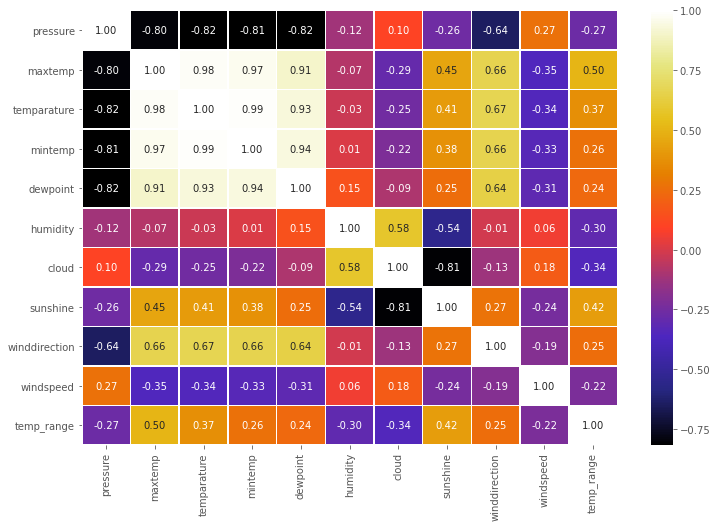

In [235]:
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix,data=df_features, annot=True, cmap='CMRmap', fmt='.2f', linewidths=0.5);

In [240]:
df_features_rev = pd.concat([df_features,df_sin_cos_values], axis=1)
df_features_rev.head()

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,temp_range,sin_day,cos_day
0,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60.0,17.2,1.3,0.017213,0.999852
1,1019.5,16.2,16.9,15.8,15.4,95.0,91.0,0.0,50.0,21.9,0.4,0.034422,0.999407
2,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,70.0,18.1,4.8,0.051620,0.998667
3,1013.4,18.1,17.8,16.9,16.8,95.0,95.0,0.0,60.0,35.6,1.2,0.068802,0.997630
4,1021.8,21.3,18.4,15.2,9.6,52.0,45.0,3.6,40.0,24.8,6.1,0.085965,0.996298


In [241]:
# Normalizing the features
scaler = StandardScaler()
features = df_features_rev
features_scaled = scaler.fit_transform(features)

In [242]:
#Splitting data into train and test
X = features_scaled
y = df['rainfall']
X_train, X_test, y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42) 

# Model Selection

In [249]:
#import the necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score

In [254]:
#For baseline model we use Logistic regression
#Initiallizing Logreg model
logreg_model = LogisticRegression(random_state=42, max_iter=200)

#Train the model
logreg_model.fit(X_train, y_train)

#Predictions on the model
y_pred = logreg_model.predict(X_test)

#Model evaluation
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test,y_pred)

print(f'Accuracy: {accuracy}')
print(f'ROC AUC Score: {roc_auc}')
print(f'Confusion Matrix:\n{confusion_matrix(y_test,y_pred)}')
print(f'Classification Report:\n{classification_report(y_test,y_pred)}')


Accuracy: 0.8561643835616438
ROC AUC Score: 0.7827112036036985
Confusion Matrix:
[[ 74  45]
 [ 18 301]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.62      0.70       119
           1       0.87      0.94      0.91       319

    accuracy                           0.86       438
   macro avg       0.84      0.78      0.80       438
weighted avg       0.85      0.86      0.85       438

